# Trying to Understand Neural Networks
### A collection of glimpses into a complex field
##### by Wolfgang Giersche, Zühlke Engineering
![Fashion MNIST t-SNE](./images/Some_Network.jpeg)


# Ways and Means to Understand Neural Networks

### Preface: Mathematical Notation of Neural Networks 
### Topology of the Loss Surface
### Topology of Activations
### Entropy, Information Gain, and the *Eureka Effect*
### Resources

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

### Preface: Mathematical Notation of Neural Networks

For today's context, a neural network is a function
$$ f: \mathbb{R}^n \rightarrow \mathbb{R}^m \text{ with }  f(\mathbf{x}) = \mathbf{y} \text{; for } \mathbf{x} \in \mathbb{R}^n \text{ and } \mathbf{y} \in \mathbb{R}^m  $$

Here, we consider only those functions that can be expressed as an affine map composed with a componentwise non-linear *activation* function 
$\varphi(\mathbf{x})$, like

$$ f^{(1)}(\mathbf{x}) = \varphi^{(1)}(\Theta^{(1)} \cdot \mathbf{x} + \mathbf{b}^{(1)}) $$ 

or a composition of e.g. two of those:

$$ f^{(2)}(\mathbf{x})=\varphi^{(2)} \big( \Theta^{(2)} \cdot \varphi^{(1)}(\Theta^{(1)} \cdot \mathbf{x}+\mathbf{b}^{(1)}) + \mathbf{b}^{(2)} \big) $$ 

or in *apply* ($\circ$) notation for a k-layer neural network

$$ f = f^{(k)} \circ  f^{(k-1)} \circ \dots \circ f^{(2)} \circ f^{(1)}(\mathbf{x}) $$

If you're new to NNs, [Michael Nielson's Web booklet](http://neuralnetworksanddeeplearning.com/) is an excellent first-time drug to get you addicted.

Typical non-linear activation functions are the sigmoid $\sigma(x)$, hyperbolic tangent $tanh(x)$ or relu:

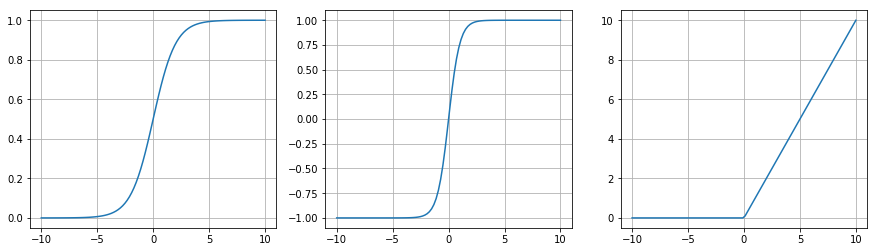

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def relu(x):
    return np.greater(x,0) * x
matplotlib.rcParams['figure.figsize'] = (15,4)
f, arr = plt.subplots(1,3)
x = np.linspace(-10,10, 100)
for i in range(3):
    arr[i].grid(True) 
arr[0].plot(x, sigmoid(x))
arr[1].plot(x, np.tanh(x))
arr[2].plot(x, relu(x))

Note that also the linear part of convolutional layers can be expressed as a simple matrix multiplication, but also that the most successful CNN architectures are slightly more complex than that. 

So here $\mathbf{x}$ is e.g. an image ($28 \times 28$ grey-scale) in case of MNIST images, and $\mathbf{y}$ is *what the network thinks about its input*. 

Training a neural network means optimizing the function $f$ such that eventually it *thinks about what might have led to the occurrence of* $\mathbf{x}$. We say *the network infers the prior*. In the case of MNIST, the prior is what the instructor told people to write down.

<img src="images/NN_2x3x3x2.png" width="400">


With $k = 3$, like in the above typical depiction, we have

$ f = f^{(3)} \circ f^{(2)} \circ f^{(1)}(\mathbf{x}) $

$f^{(1)}$ maps the input layer to the first hidden layer *hidden_1* 

$f^{(2)}$ maps the first hidden layer *hidden_1* to the second hidden layer *hidden_2* 

$f^{(3)}$ maps the second hidden layer *hidden_2* to the output layer $\mathbf{y}$




### Optimization: Tweaking the Network Parameters

For MNIST hand-written digit recognition, we want the activities of the 10 output neurons interpretable as the probability that a given Image is actually depicting the corresponding digit.

If that works out, we can comfortably call the neuron with maximum activation the *prediction* of the network for a given image.

### The Objective Function

#### The *Distance* from the Truth

mean squared error:
$$ L_{sme}(y, \bar{y}, \Theta) = \sum_{i=1}^N || y_i(\Theta, x) - \bar{y}_i || $$ 

cross entropy:
$$ L_{ce}(y, \bar{y}, \Theta) = - \sum_{i=1}^N \bar{y}_i \cdot log(y_i(\Theta, x)) $$ 

Where $N$ is the number of input vectors, and $y_i$ is supposed be constrained within the range $]0, 1[$ and $\bar{y}_i$ denotes the given labels - the *truth* or the *prior*

### Gradient Descent and Back Propagation

To find the minimum of such an objective function, we employ *gradient descent*, with respect to the parameter set $(\Theta, b)$, using *back propagation* to efficiently compute the gradients.

Sebastian Ruder has a [very nice overview](http://ruder.io/optimizing-gradient-descent/) of the most popular gradient descent algorithms.

In his blog's [Chapter 2](http://neuralnetworksanddeeplearning.com/chap2.html), Michael Nielson's explains back propagation in great detail.

The seminal [Rummelhardt Paper](https://www.iro.umontreal.ca/~vincentp/ift3395/lectures/backprop_old.pdf) is (with all respect) at most an interesting trip into the past.

# Topology of the Loss Surface

##### About Minima and Saddles

Why do networks so rarely get trapped in local minima?

![surface](images/surface.png)

### Critical Points in High-Dimensional Space

#### - Any minimimum will have a vanishing gradient: $\nabla_{\Theta} L(y,\bar{y}, \Theta) = 0$

#### - Any minimum will have non-negative Eigenvalues in it's Hessian

#### - The probability of local minima will decrease with the number of parameters

#### - It's the saddles that are more problematic in large neural networks



### Resources

A not so rigorous, yet pretty approachable read on the role of saddle points (unpublished)
[Are Saddles Good Enough for Deep Learning](https://arxiv.org/abs/1706.02052), Sankar et al. arXiv:1706.02052 [stat.ML]


More rigorously, Choromanska, A., Henaff, M., Mathieu, M., Arous, G. B., & LeCun, Y. (2015). [The loss surfaces of multilayer networks](http://arxiv.org/abs/1412.0233). Journal of Machine Learning Research, 38, 192-204.

empirically verify that

- For large-size networks, most local minima are equivalent and yield similar performance on a test set.
- The probability of finding a “bad” (high value) local minimum is non-zero for small-size networks and decreases quickly with network size.
- Finding the global minimum on the training set may lead to overfitting.

Dauphin, Y., Pascanu, R., Gülcehre, C¸ ., Cho, K., Ganguli, S., and Bengio, Y. (2014). [Identifying and attacking the saddle point problem in high-dimensional non-convex optimization](http://arxiv.org/abs/1406.2572). In NIPS.

Claim that it's not local minima but rather high error saddle points that can keep the network from converging well. The devise a strategy called "Saddle-free Newton method" to *attack* the saddles

# Topology Of Activations

Here, we mean the topology of the entire input space as it is propagated from layer to layer.

![Manifolds](./images/manifold.png)

#### Resources 

Get a first visual impression with [Karpthy's ConvnetJS](https://cs.stanford.edu/people/karpathy/convnetjs/demo/classify2d.html)

For another visual, yet in-depth discussion on topology, [Chris Olah's blog](http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/) is certainly a good place to start with. 

Interesting research direction: [Poole et al. 2016](http://arxiv.org/abs/1606.05340) exploit Riemannian geometry together with mean field theory to get to some deeper insight into the expressiveness of deep neural networks.

## Tutorial: Topology

Watching the topology develop during training may help to understand the forces that create flat saddle planes:

### The Problem

An unknown distribution $\mathcal{C}$ from the alphabet $ \{R, B \} $ creates a uniform distribution of points $(x,y)$. 
From a known number of such points and their priors (whether they result from $R$ or $B$, train a network
to infer for any other point $(x,y)$, whether it stems from symbol $R$ or $B$.


![rb](./images/rb-distribution.png)
Load ./Topology.ipynb into your jupyter notebook

# Entropy, Information Gain, And The *εὕρηκα Effect*

- Finding something out sometimes makes you happy, before you even see, what it's good for.

- The human objective function *joy* provides feedback without the *subsequent layers* input.

- To a (science-loving) human, revealing structure is itself satisfactory.

- Revealing structure = discovering a compressed representation

- Maybe information theory has some tools...?

- Can an artificial neural network layer already do sth without the input from subsequent layer?

## Entropy and Mutual Information: Resources

Introduction: [Aurelion Geron's Youtube video](https://www.youtube.com/watch?v=ErfnhcEV1O8)

Most inspiring paper (to me): [Tishby et al. Deep Learning and the Information Bottleneck Principle](http://arxiv.org/abs/1503.02406)

"...we ... formulate the goal of deep learning as an information theoretic tradeoff between compression and prediction"

#### Entropy 

$$ H(X) := -\sum_{x \in \mathcal{X}} p(x) \log p(x)$$

#### Conditional entropy 

$$ H(Y \big| X) := \sum_{x \in \mathcal{X}} p(x) H(Y\big|X=x) = -\sum_{x \in \mathcal{X}} \sum_{y\in \mathcal{Y}} p(x,y) \log(\frac{p(x,y)}{p(x)})$$

#### Mutual Information (Information Gain)

$$ I(X;Y) := H(Y) - H(Y|X) $$

$$ I(X;Y) = \sum_{x \in \mathcal{X}} \sum_{y\in \mathcal{Y}} p(x,y)log(\frac{p(x,y)}{p(x)p(y)}) $$

## Optimizing Information Gain

#### Bold Claim: Information gain allows a layer to improve its activations without waiting for backpropagated gradients to arrive.

#### Working with Information Gain
- Measure the information gain of the activations w/r to the *prior* 
- Consider information gain as objective function 
- Problem: We need some differentiable partitioning to do bin statistics

#### Big Disappointment: It doesn't work (yet).

#### Still interesting enough to pursue...

# Summary

#### Various mathematical approaches reveal more and more insight into neural network behaviour

#### It's not so difficult to *play* with these concepts

#### Understanding the dynamics helps being successful in applying neural networks

#### Missing Subjects:

- Regularization
- Layer Visualization
- Adversarial Attacks
- Using Auto-Encoders


# Popular Web Resources

[Nielsen2015] <a name="Nielsen2015"/> 
Michael A. Nielsen, Neural Networks and Deep Learning (2015). *Determination Press* -
[Blog](http://neuralnetworksanddeeplearning.com/) - [Github](https://github.com/mnielsen/neural-networks-and-deep-learning)

[Ruder2016] <a name="Ruder2016"/>
Sebastian Ruder (2016). An Overview of Gradient Descent Optimization Algorithms. *Personal Blog and PDF* -
[Blog](http://ruder.io/optimizing-gradient-descent/) - [arxiv](https://arxiv.org/pdf/1609.04747v2.pdf)

[Olah2018] <a name="Olah2018"/> Olah, et al. (2018). "The Building Blocks of Interpretability", *Distill*. - 
[Blog](https://distill.pub/2018/building-blocks/)

[Olah2017] <a name="Olah2017"/> 
Olah, et al. (2017), "Feature Visualization", *Distill*. - 
[Github](https://github.com/distillpub/post--feature-visualization) - [Blog](https://distill.pub/2017/feature-visualization/)

[Olah2014-1] <a name="Olah2014-1"/>
Christopher Olah (2014). "Neural Networks, Manifolds, and Topology - *Personal Blog* - 
[Blog](http://colah.github.io/posts/2014-03-NN-Manifolds-Topology)

[Olah2014-2] <a name="Olah2014-2"/> 
Cristopher Olah (2014). Visualizing MNIST: An Exploration of Dimensionality Reduction. *Personal Blog* -
[Blog](http://colah.github.io/posts/2014-10-Visualizing-MNIST/)

[Geron2018] <a name="Geron2018"/> 
Aurelion Geron (2018). Entropy, Cross-Entropy, & KL-Divergence. *Video Blog* -
[Youtube](https://www.youtube.com/watch?v=ErfnhcEV1O8)

[Geron2017] <a name="Geron2017"/> 
Arelion Geron (2017). Capsule Networks. *Video Blogs* - 
[Youtube: Explanation](https://www.youtube.com/watch?v=pPN8d0E3900) - [Youtube: Implementation](https://www.youtube.com/watch?v=2Kawrd5szHE) - [Github](https://github.com/ageron/handson-ml)




# Scientific Resources For The Covered Subjects

[Tishby2000] <a name="Tishby2000"/> 
Tishby, N., Pereira, F. C., & Bialek, W. (2000). The information bottleneck method. https://doi.org/10.1108/eb040537 - 
[Arxiv](https://arxiv.org/abs/physics/0004057)

[Tishby2015] <a name="Tishby2015"/> 
Tishby, N., & Zaslavsky, N. (2015). Deep Learning and the Information Bottleneck Principle. Ieee, 1–5. https://doi.org/10.1109/ITW.2015.7133169 -
[Arxiv](http://arxiv.org/abs/1503.02406)

[Khadivi2016] <a name="Khadivi2016"/> 
Khadivi, P., Tandon, R., & Ramakrishnan, N. (2016). Flow of Information in Feed-Forward Deep Neural Networks. - 
[Arxiv](http://arxiv.org/abs/1603.06220)


# Hand-picked Scientific Resources On Related Topics

[Su2017] <a name="Su2017"/> 
Su, J., Vargas, D. V., & Kouichi, S. (2017). One pixel attack for fooling deep neural networks. -
[Arxiv](http://arxiv.org/abs/1710.08864)

[Sabour2017] <a name="Sabour2017"/> 
Sabour, S., Frosst, N., & Hinton, G. E. (2017). Dynamic Routing Between Capsules. -
[Arxiv](http://arxiv.org/abs/1710.09829)

[Kawaguchi2017] <a name="Kawaguchi2017"/>
Kawaguchi, Kenji & Pack Kaelbling, Leslie & Bengio, Y. (2017). Generalization in Deep Learning. -  [Arxiv](https://arxiv.org/abs/1710.05468)
[Strobelt2018] <a name="Strobelt2018"/>

Strobelt, H., Gehrmann, S., Pfister, H., & Rush, A. M. (2018). LSTMVis: A Tool for Visual Analysis of Hidden State Dynamics in Recurrent Neural Networks. *IEEE Transactions on Visualization and Computer Graphics, 24(1), 667–676.* https://doi.org/10.1109/TVCG.2017.2744158 - 
[Vimeo](https://vimeo.com/215907429) - [Arxiv](https://arxiv.org/pdf/1606.07461.pdf) - [Homepage](http://lstm.seas.harvard.edu/) - [github](https://github.com/HendrikStrobelt/LSTMVis)
